In [1]:
from tensorflow import keras
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#データサイズ初期設定
sampling_rate=8000
audio_duration=6
audio_length=sampling_rate*audio_duration

In [3]:
#学習済みモデルの読みこみ
reconstructed_model = keras.models.load_model("./model-65.h5")
reconstructed_model

In [4]:
#wavファイルの確認
data,_=librosa.core.load("./027aa77c.wav",sr=sampling_rate,res_type='kaiser_fast')
data_post=data.reshape(-1, 1)
print(data_post.shape)
data_post

(71360, 1)


array([[-1.2207031e-04],
       [-2.1362305e-04],
       [-1.2207031e-04],
       ...,
       [-3.0517578e-05],
       [-3.0517578e-05],
       [-3.0517578e-05]], dtype=float32)

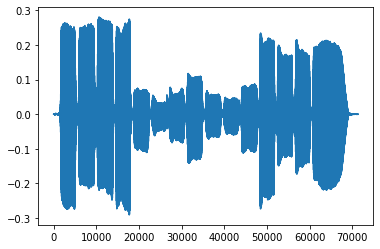

In [5]:
#クラリネットデータの可視化
plt.plot(data_post)
plt.show()

In [6]:
#スケール変換により、平均値を0と分散1に変換する。
scaler=StandardScaler()
scaler=scaler.fit(data_post)
data_result=scaler.transform(data_post)
data_result

array([[-1.1065511e-03],
       [-2.2140075e-03],
       [-1.1065511e-03],
       ...,
       [ 9.0529181e-07],
       [ 9.0529181e-07],
       [ 9.0529181e-07]], dtype=float32)

48000


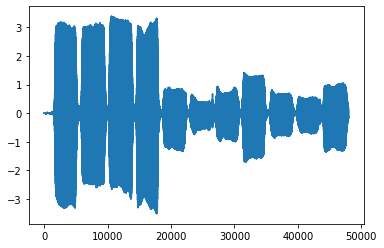

In [7]:
data_result=data_result[0:audio_length]
#波形データの中身の確認➁（グラフより）⇒答えはクラリネット
plt.plot(data_result)
print(data_result.size)
plt.show()

In [8]:
#初期化
dim=(audio_length,1)#二次元でサイズを指定
ary=np.empty((1,*dim))
ary[0,]=[[d] for d in data_result] 
ary.shape

(1, 48000, 1)

In [9]:
predictions=reconstructed_model.predict(ary,verbose=1)

1/1 [==============================] - 28s 28s/step


In [10]:
predictions

array([[1.2055272e-02, 9.8793811e-01, 6.6147963e-06]], dtype=float32)

＊ソフトマックス関数によって、出力される結果は[Cello,Clarinet,Applause]の順に、確率が格納された配列となる。

In [11]:
#argmax→配列の中で最も大きな値のインデックスを取得する。
result=np.argmax(predictions)
if result==0:
  print("推測結果:","Cello")
elif result==1:
  print("推測結果:","Clarinet")
elif result==2:
  print("推測結果:","Applause")

推測結果: Clarinet
